In [1]:
# 正则化 — 从0开始
# http://zh.gluon.ai/chapter_supervised-learning/reg-scratch.html

# 高维线性回归
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon
import mxnet as mx

num_train=20
num_test=100
num_inputs=200

/home/ly/anaconda3/envs/learning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# 生成数据集
true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

In [3]:
X = nd.random.normal(shape=(num_train+num_test, num_inputs))
y = nd.dot(X, true_w) + true_b
y += 0.01 * nd.random.normal(shape=y.shape)

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [4]:
import random
batch_size = 1
def data_iter(num_examples):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i:min(i+batch_size, num_examples)])
        yield X.take(j), y.take(j)

In [5]:
# 初始化模型参数
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

In [6]:
def L2_penalty(w, b):
    return ((w**2).sum() + b**2) / 2

In [10]:
# 定义训练和测试
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import numpy as np

def net(X, w, b):
    return nd.dot(X, w) + b

def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

def test(net, params, X, y):
    return square_loss(net(X, *params), y).mean().asscalar()
    #return np.mean(square_loss(net(X, *params), y).asnumpy())

def train(lambd):
    epochs = 10
    learning_rate = 0.005
    w, b = params = init_params()
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter(num_train):
            with autograd.record():
                output = net(data, *params)
                loss = square_loss(output, label) + lambd * L2_penalty(*params)
            loss.backward()
            sgd(params, learning_rate, batch_size)
        train_loss.append(test(net, params, X_train, y_train))
        test_loss.append(test(net, params, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    plt.show()
    return 'learned w[:10]:', w[:10].T, 'learned b:', b

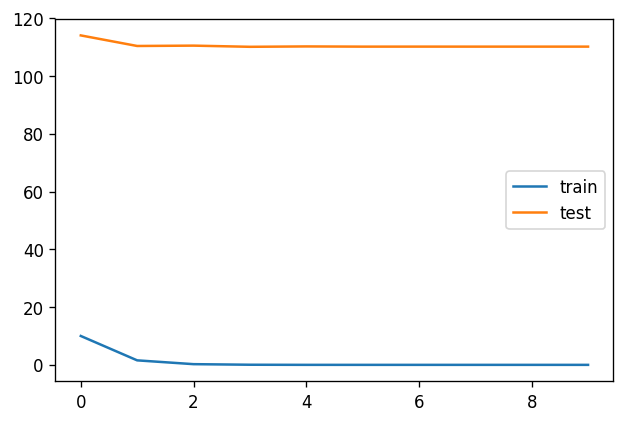

('learned w[:10]:', 
[[-0.09904434 -1.5592608  -0.7493825  -0.88491213  0.92723864 -0.24572271
   0.7544554   1.3412445   0.07300565  0.5030678 ]]
<NDArray 1x10 @cpu(0)>, 'learned b:', 
[0.18223655]
<NDArray 1 @cpu(0)>)

[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
<NDArray 10x1 @cpu(0)>
0.05


In [15]:
learned_params = train(0)
print(learned_params)
print(true_w[:10])
print(true_b)

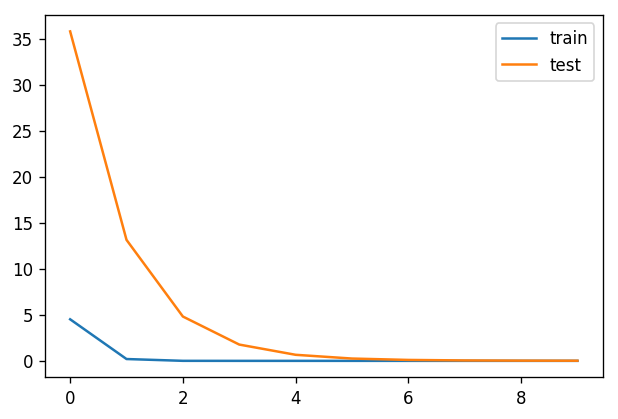

('learned w[:10]:', 
[[ 0.00972046  0.00516798 -0.00622696  0.00598501 -0.00149103  0.00288846
   0.01519817  0.0001366  -0.00182263  0.00202826]]
<NDArray 1x10 @cpu(0)>, 'learned b:', 
[0.00804077]
<NDArray 1 @cpu(0)>)

[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
<NDArray 10x1 @cpu(0)>
0.05


In [16]:
learned_params = train(5)
print(learned_params)
print(true_w[:10])
print(true_b)